### best parameter

{'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 'sqrt'}

In [ ]:
# 2. Import libraries and modules
import numpy as np
import pandas as pd
 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib 
 
# 3. Load red wine data.
# dataset_url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
# data = pd.read_csv(dataset_url, sep=';')

train_data = pd.read_csv('./public.train.csv')
test_data = pd.read_csv('./public.test.csv')
submit = pd.read_csv('./submit_example.csv') 

# 4. Split data into training and test sets
y = train_data['发电量']
X = train_data.drop(['发电量','ID'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=123, 
                                                   )
 
# 5. Declare data preprocessing steps
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         RandomForestRegressor(n_estimators=100))
 
# 6. Declare hyperparameters to tune
hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestregressor__max_depth': [None, 5, 3, 1]}
 
# 7. Tune model using cross-validation pipeline
clf = GridSearchCV(pipeline, hyperparameters, cv=10)
 
clf.fit(X_train, y_train)
 
# 8. Refit on the entire training set
# No additional code needed if clf.refit == True (default is True)
 
# 9. Evaluate model pipeline on test data
pred = clf.predict(X_test)
print (r2_score(y_test, pred))
print (mean_squared_error(y_test, pred))
 
# 10. Save model for future use
joblib.dump(clf, 'rf_regressor.pkl')
# To load: clf2 = joblib.load('rf_regressor.pkl')

In [ ]:

clf = joblib.load("rf_regressor.pkl")

df_result = pd.DataFrame()
df_result['ID'] = list(test_data['ID'])
test_feature = test_data.drop('ID', axis=1)
pre = clf.predict(test_feature)

df_result['Score'] = pre
df_result.to_csv('result/submit.csv', index=False, header=False, float_format='%.8f')


In [1]:
#coding=utf-8
#读取数据
import  pandas as pd
import numpy as np
import scipy as sp

train_data = pd.read_csv('./public.train.csv')
test_data = pd.read_csv('./public.test.csv')
submit = pd.read_csv('./submit_example.csv')
y = train_data['发电量']
X = train_data.drop(['ID','发电量'], axis=1)
X.head()

,板温,现场温度,光照强度,转换效率,转换效率A,转换效率B,转换效率C,电压A,电压B,电压C,电流A,电流B,电流C,功率A,功率B,功率C,平均功率,风速,风向
0,-19.14,-17.4,34,80.55,106.32,16.98,118.36,729,709,725,1.34,0.22,1.50,976.86,155.98,1087.50,740.11,0.6,272
1,-18.73,-17.3,30,99.90,139.00,21.20,139.51,728,717,726,1.55,0.24,1.56,1128.40,172.08,1132.56,811.01,0.8,275
2,-17.54,-17.0,41,82.48,114.86,14.91,117.66,731,722,720,1.75,0.23,1.82,1279.25,166.06,1310.40,918.57,1.1,283
3,-15.43,-16.6,53,73.98,101.72,15.55,104.67,730,727,726,2.02,0.31,2.09,1474.60,225.37,1517.34,1072.44,0.9,280
4,-14.60,-16.3,65,64.62,86.86,13.09,93.92,727,729,728,2.13,0.32,2.30,1548.51,233.28,1674.40,1152.06,1.1,280


In [2]:
plt_X = np.arange(X.shape[0])
plt_X

array([   0,    1,    2, ..., 8997, 8998, 8999])

In [3]:
X["板温"].shape

(9000,)

### 1. 展示 “板温” 数据

In [4]:
import matplotlib.pyplot as plt
import numpy as np
plt_X = np.arange(X.shape[0])
plt.plot(plt_X,(X["板温"]).reshape(X["板温"].shape[0],))
plt.ylabel('Plate temperature')
plt.show()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


<Figure size 640x480 with 1 Axes>

### 2. 展示“现场温度” 数据

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


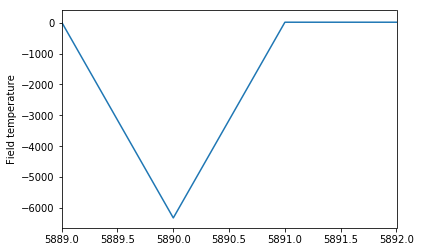

In [12]:
import matplotlib.pyplot as plt
import numpy as np
plt_X = np.arange(X.shape[0])
plt.plot(plt_X,(X["现场温度"]).reshape(X["现场温度"].shape[0],))
plt.ylabel('Field temperature')
#设置坐标轴范围
plt.xlim((5889, 5892))
# plt.ylim((-2, 2))
plt.show()

In [6]:
X["现场温度"].describe()

count    9000.000000
mean       -0.629456
std        67.430126
min     -6321.700000
25%        -7.600000
50%        -2.400000
75%         8.100000
max        78.700000
Name: 现场温度, dtype: float64

In [22]:
#过滤异常值，将其变为空值
# row_indexs = (data[u'销量'] < 400) | (data[u'销量'] > 5000)  #得到过滤数据的索引
# data.loc[row_indexs,u'销量'] = None  #过滤数据
X.loc[X["现场温度"]< -1000] = -0.629456

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


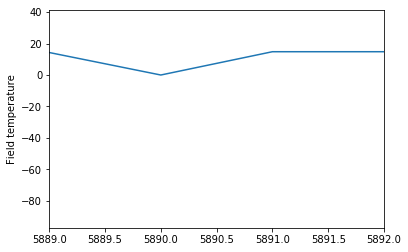

In [23]:
import matplotlib.pyplot as plt
import numpy as np
plt_X = np.arange(X.shape[0])
plt.plot(plt_X,(X["现场温度"]).reshape(X["现场温度"].shape[0],))
plt.ylabel('Field temperature')
#设置坐标轴范围
plt.xlim((5889, 5892))
# plt.ylim((-2, 2))
plt.show()

### 3. 展示“光照强度” 数据

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


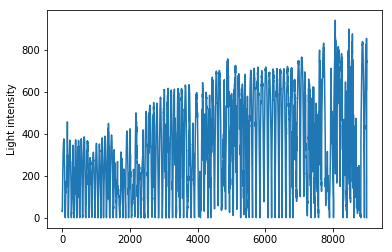

In [30]:
import matplotlib.pyplot as plt
import numpy as np
plt_X = np.arange(X.shape[0])
plt.plot(plt_X,(X["光照强度"]).reshape(X["光照强度"].shape[0],))
plt.ylabel('Light intensity')
plt.show()

### 4. 展示“转换效率” 数据

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


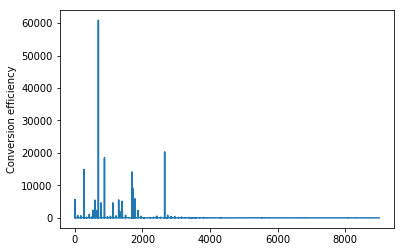

In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt_X = np.arange(X.shape[0])
plt.plot(plt_X,(X["转换效率"]).reshape(X["转换效率"].shape[0],))
plt.ylabel('Conversion efficiency')
plt.show()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


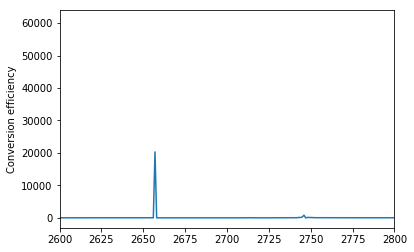

In [4]:
import matplotlib.pyplot as plt
import numpy as np
plt_X = np.arange(X.shape[0])
plt.plot(plt_X,(X["转换效率"]).reshape(X["转换效率"].shape[0],))
plt.ylabel('Conversion efficiency')
#设置坐标轴范围
plt.xlim((2600, 2800))
plt.show()

In [6]:
X.loc[X["转换效率"] > 1614] = 0 #异常值用平均值替换 std=807

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


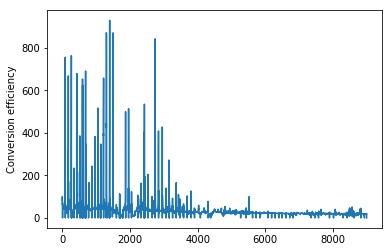

In [7]:
import matplotlib.pyplot as plt
import numpy as np
plt_X = np.arange(X.shape[0])
plt.plot(plt_X,(X["转换效率"]).reshape(X["转换效率"].shape[0],))
plt.ylabel('Conversion efficiency')
#设置坐标轴范围
# plt.xlim((2600, 2800))
plt.show()

In [27]:
X["转换效率"].describe()

count     9000.000000
mean        64.068471
std        807.425420
min          0.000000
25%         20.507500
50%         25.225000
75%         37.190000
max      60856.240000
Name: 转换效率, dtype: float64

### 5. 展示“转换效率A” 数据

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


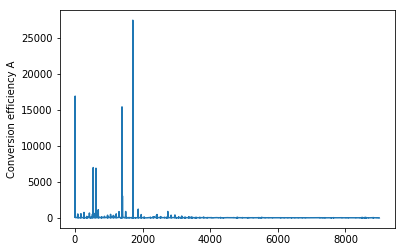

In [32]:
import matplotlib.pyplot as plt
import numpy as np
plt_X = np.arange(X.shape[0])
plt.plot(plt_X,(X["转换效率A"]).reshape(X["转换效率A"].shape[0],))
plt.ylabel('Conversion efficiency A')
plt.show()

### 6. 展示“转换效率B” 数据

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


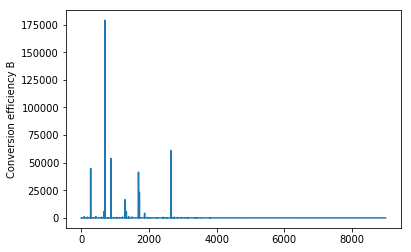

In [33]:
import matplotlib.pyplot as plt
import numpy as np
plt_X = np.arange(X.shape[0])
plt.plot(plt_X,(X["转换效率B"]).reshape(X["转换效率B"].shape[0],))
plt.ylabel('Conversion efficiency B')
plt.show()

### 7. 展示“转换效率C” 数据

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


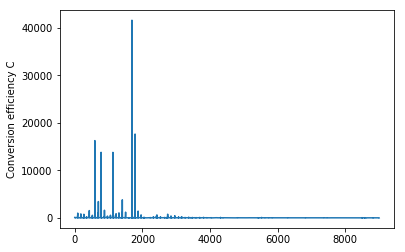

In [34]:
import matplotlib.pyplot as plt
import numpy as np
plt_X = np.arange(X.shape[0])
plt.plot(plt_X,(X["转换效率C"]).reshape(X["转换效率C"].shape[0],))
plt.ylabel('Conversion efficiency C')
plt.show()

### 8. 展示“电压A” 数据

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


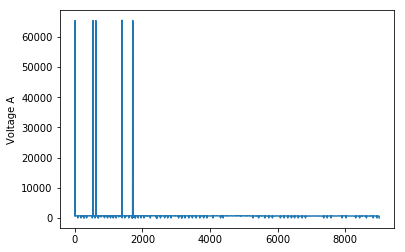

In [35]:
import matplotlib.pyplot as plt
import numpy as np
plt_X = np.arange(X.shape[0])
plt.plot(plt_X,(X["电压A"]).reshape(X["电压A"].shape[0],))
plt.ylabel('Voltage A')
plt.show()

### 9. 展示“电压B” 数据

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


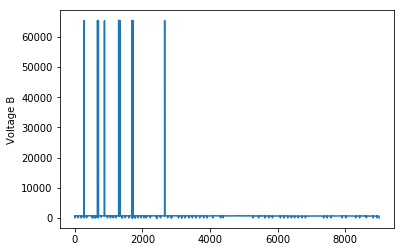

In [36]:
import matplotlib.pyplot as plt
import numpy as np
plt_X = np.arange(X.shape[0])
plt.plot(plt_X,(X["电压B"]).reshape(X["电压B"].shape[0],))
plt.ylabel('Voltage B')
plt.show()

### 10. 展示“电压C” 数据

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


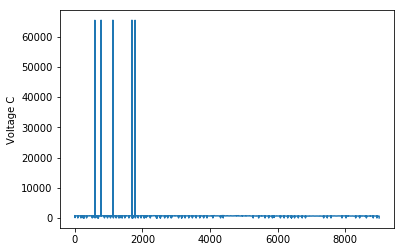

In [38]:
import matplotlib.pyplot as plt
import numpy as np
plt_X = np.arange(X.shape[0])
plt.plot(plt_X,(X["电压C"]).reshape(X["电压C"].shape[0],))
plt.ylabel('Voltage C')
plt.show()

### 11. 展示“电流A” 数据

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


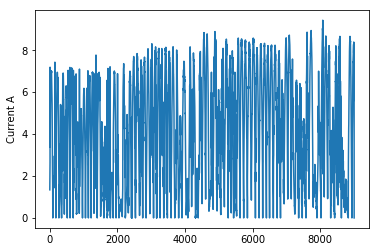

In [39]:
import matplotlib.pyplot as plt
import numpy as np
plt_X = np.arange(X.shape[0])
plt.plot(plt_X,(X["电流A"]).reshape(X["电流A"].shape[0],))
plt.ylabel('Current A')
plt.show()

### 12. 展示“电流B” 数据

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


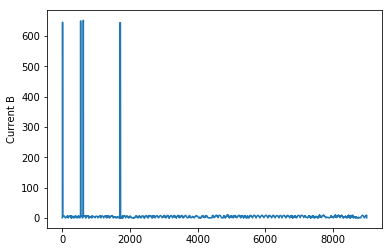

In [40]:
import matplotlib.pyplot as plt
import numpy as np
plt_X = np.arange(X.shape[0])
plt.plot(plt_X,(X["电流B"]).reshape(X["电流B"].shape[0],))
plt.ylabel('Current B')
plt.show()

### 13. 展示“电流C” 数据

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


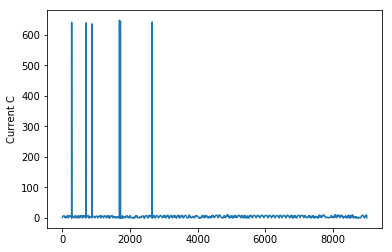

In [41]:
import matplotlib.pyplot as plt
import numpy as np
plt_X = np.arange(X.shape[0])
plt.plot(plt_X,(X["电流C"]).reshape(X["电流C"].shape[0],))
plt.ylabel('Current C')
plt.show()

### 14. 展示“功率A” 数据

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


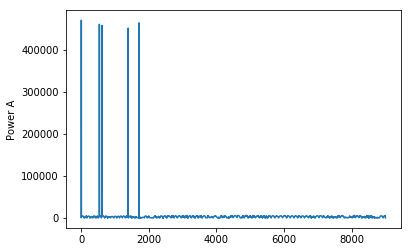

In [42]:
import matplotlib.pyplot as plt
import numpy as np
plt_X = np.arange(X.shape[0])
plt.plot(plt_X,(X["功率A"]).reshape(X["功率A"].shape[0],))
plt.ylabel('Power A')
plt.show()

### 15. 展示“功率B” 数据

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


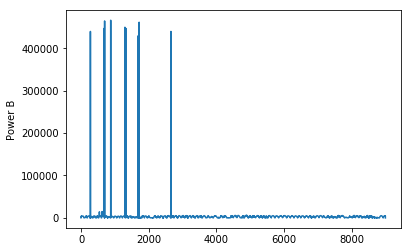

In [43]:
import matplotlib.pyplot as plt
import numpy as np
plt_X = np.arange(X.shape[0])
plt.plot(plt_X,(X["功率B"]).reshape(X["功率B"].shape[0],))
plt.ylabel('Power B')
plt.show()

### 16. 展示“功率C” 数据

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


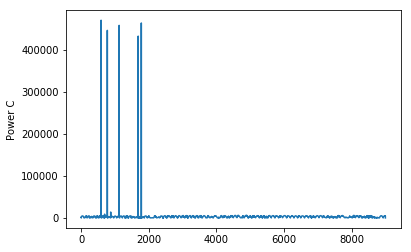

In [44]:
import matplotlib.pyplot as plt
import numpy as np
plt_X = np.arange(X.shape[0])
plt.plot(plt_X,(X["功率C"]).reshape(X["功率C"].shape[0],))
plt.ylabel('Power C')
plt.show()

### 17. 展示“平均功率” 数据

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


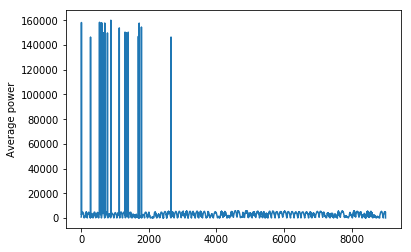

In [45]:
import matplotlib.pyplot as plt
import numpy as np
plt_X = np.arange(X.shape[0])
plt.plot(plt_X,(X["平均功率"]).reshape(X["平均功率"].shape[0],))
plt.ylabel('Average power')
plt.show()

### 18. 展示“风速” 数据

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


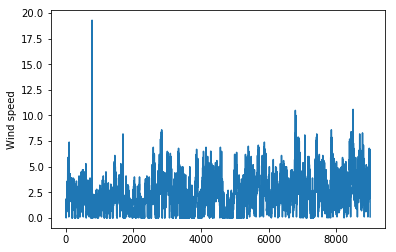

In [46]:
import matplotlib.pyplot as plt
import numpy as np
plt_X = np.arange(X.shape[0])
plt.plot(plt_X,(X["风速"]).reshape(X["风速"].shape[0],))
plt.ylabel('Wind speed')
plt.show()

### 19. 展示“风向” 数据

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


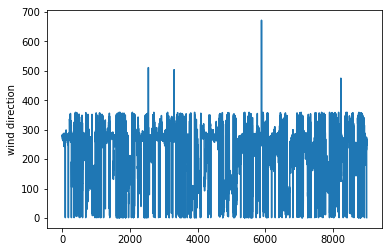

In [47]:
import matplotlib.pyplot as plt
import numpy as np
plt_X = np.arange(X.shape[0])
plt.plot(plt_X,(X["风向"]).reshape(X["风向"].shape[0],))
plt.ylabel('wind direction')
plt.show()